In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd

# Prepare the dataset (Download 'insurance.csv' from Kaggle)
df = pd.read_csv('insurance.csv')
print(f"Original Shape: {df.shape}")

# One-Hot Encoding: creates binary columns (0 or 1)
# drop_first=True avoid the "dummy variable trap" (multicollinearity)
df_encoded = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True)


# Convert True/False to 1/0 for the math
df_encoded = df_encoded.astype(float)

X = df_encoded.drop('charges', axis=1).values
y = df_encoded['charges'].values

print(f"Final X Shape/Input Matrix: {X.shape}")
print(f"Final y Shape/Target Vector: {y.shape}")


Original Shape: (1338, 7)
Final X Shape/Input Matrix: (1338, 8)
Final y Shape/Target Vector: (1338,)


In [3]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [4]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(X_scaled, y)
y_pred_sklearn = lr_model.predict(X_scaled)
print(f"W: {lr_model.coef_}")
print(f"B: {lr_model.intercept_:.4f}")

W: [3607.47273619 2067.69196584  572.99820995  -65.65358545 9623.91280164
 -151.36329682 -460.59970835 -411.70352944]
B: 13270.4223


In [5]:

# Calculating the diffrenet metrics

import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# R-squared: How much of the 'variance' in charges does your model explain?
# (Goal: Close to 1.0. Without interaction, this is usually ~0.75)
r2 = r2_score(y, y_pred_sklearn)

# 2. Mean Absolute Error (MAE): The "Human" metric.
# Tells you: "On average, my prediction is off by $X dollars."
mae = mean_absolute_error(y, y_pred_sklearn)

# Root Mean Squared Error (RMSE): Punishes large outliers.
# If this is much higher than MAE, your model is failing badly on specific rows.

rmse = np.sqrt(mean_squared_error(y, y_pred_sklearn))

print(f"R2 Score: {r2:.4f}")
print(f"Avg Error (MAE): ${mae:,.2f}")
print(f"Large Error Penalty (RMSE): ${rmse:,.2f}")



R2 Score: 0.7509
Avg Error (MAE): $4,170.89
Large Error Penalty (RMSE): $6,041.68


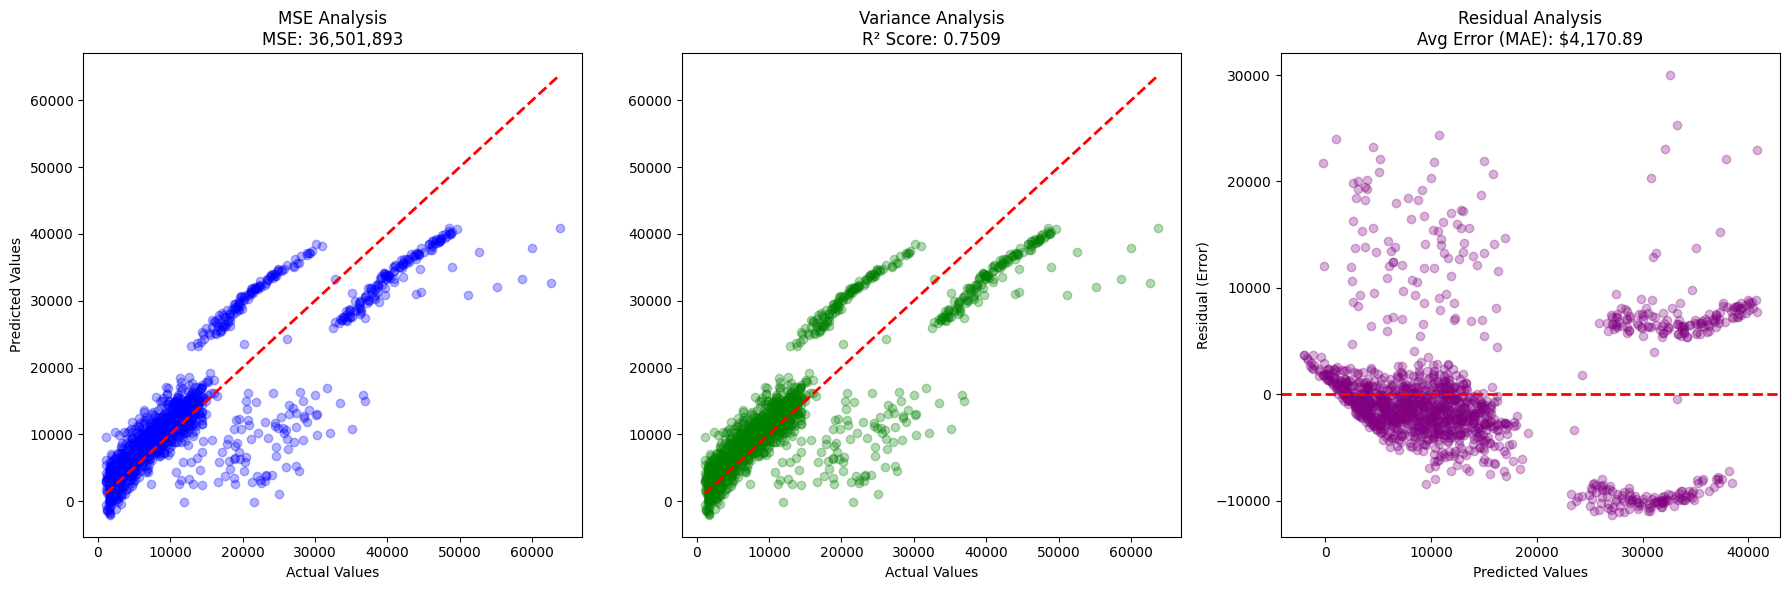

In [6]:
# Graphing the metrics with actual and predicted data
from course_labs.evaluation_graphs import plot_model_performance

# Show everything
plot_model_performance(y, y_pred_sklearn)

# Just show the Residuals (MAE) to see if more features needed
#plot_model_performance(y, y_pred_sklearn, metrics=['mae'])

# Show R2 and MSE to compare against a baseline
#plot_model_performance(y, y_pred_sklearn, metrics=['r2', 'mse'])


In [7]:


def predict_insurance_charge(age, bmi, children, sex, smoker, region, mu, sigma, w, b):
    """
    Predicts medical charges from raw input.
   """

    # Manual One-Hot Encoding (to match df_encoded structure)
    # [age, bmi, children, sex_male, smoker_yes, nw, se, sw, interaction]

    sex_male = 1.0 if sex.lower() == 'male' else 0.0
    smoker_yes = 1.0 if smoker.lower() == 'yes' else 0.0

    # Region logic (Northeast is our 'dropped' baseline)
    nw = 1.0 if region.lower() == 'northwest' else 0.0
    se = 1.0 if region.lower() == 'southeast' else 0.0
    sw = 1.0 if region.lower() == 'southwest' else 0.0


    # Create the Feature Vector
    x_raw = np.array([age, bmi, children, sex_male, smoker_yes, nw, se, sw])

    # 4. SCALE the input
    # Uses the mu and sigma from the training data
    x_scaled = (x_raw - mu) / sigma

    #  f(x) = w • x + b
    prediction = np.dot(x_scaled, w) + b

    return prediction
